In [105]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pylab as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
%matplotlib inline
%pdb

#导出HTML时，不输出代码
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) \
                { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>'
                , raw=True)

Automatic pdb calling has been turned ON


In [106]:
crash = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

crash = crash[['Date', 'Time', 'Location', 'Operator', 'Type', 'Aboard', 'Fatalities']]

In [107]:
'''
#处理错误的日期
#标记错误的日期
def t(a):
    try:
        return pd.to_datetime(a)
    except BaseException:
        return '**'

wIndex = crash[(crash['Time']).apply(t) == '**'].index

aList = [1710, 1949, 3536, 4829]

for a in wIndex:
    if 'c' in  crash.loc[a, 'Time']:
        crash.loc[a, 'Time'] = crash.loc[a, 'Time'][-5:]
    elif a in aList:
        crash.loc[a, 'Time'] = crash.loc[a, 'Time'][:2] + ':' + crash.loc[a, 'Time'][-2:]
    else:
        crash.loc[a, 'Time'] = crash.loc[a, 'Time'][1:]

#处理缺失time
def hand_na(a):
    if a == NaN:
        a = '00:00'
    return a
        

crash['Datetime'] = pd.to_datetime(crash['Date'] + ' ' + crash['Time'])

#crash.drop(['Date', 'Time'], axis=1, inplace=True)
'''

"\n#\xe5\xa4\x84\xe7\x90\x86\xe9\x94\x99\xe8\xaf\xaf\xe7\x9a\x84\xe6\x97\xa5\xe6\x9c\x9f\n#\xe6\xa0\x87\xe8\xae\xb0\xe9\x94\x99\xe8\xaf\xaf\xe7\x9a\x84\xe6\x97\xa5\xe6\x9c\x9f\ndef t(a):\n    try:\n        return pd.to_datetime(a)\n    except BaseException:\n        return '**'\n\nwIndex = crash[(crash['Time']).apply(t) == '**'].index\n\naList = [1710, 1949, 3536, 4829]\n\nfor a in wIndex:\n    if 'c' in  crash.loc[a, 'Time']:\n        crash.loc[a, 'Time'] = crash.loc[a, 'Time'][-5:]\n    elif a in aList:\n        crash.loc[a, 'Time'] = crash.loc[a, 'Time'][:2] + ':' + crash.loc[a, 'Time'][-2:]\n    else:\n        crash.loc[a, 'Time'] = crash.loc[a, 'Time'][1:]\n\n#\xe5\xa4\x84\xe7\x90\x86\xe7\xbc\xba\xe5\xa4\xb1time\ndef hand_na(a):\n    if a == NaN:\n        a = '00:00'\n    return a\n        \n\ncrash['Datetime'] = pd.to_datetime(crash['Date'] + ' ' + crash['Time'])\n\n#crash.drop(['Date', 'Time'], axis=1, inplace=True)\n"

In [108]:
#提取Nation
def get_loc(a):
    if pd.isnull(a):
        pass
    else:
        a = a.split(',')[-1].strip()
    return a

crash['Nation'] = crash['Location'].apply(get_loc)
#将标为美国州的字段修改为USA
state = pd.ExcelFile('state_list.xlsx')
state = state.parse('Sheet1')
stateList = state[state.columns[0]].iloc[2:]

#将stateList格式标准化，确保第二个单词为大写开头
def upper_first(a):
    a = a.strip()
    if ' ' in a:
        last = a.split(' ')[-1]
        last = last[0].upper() + last[1:]
        a = a.split(' ')[0] + ' ' + last
    return a

stateList = stateList.apply(upper_first)

crash.loc[crash['Nation'].isin(stateList), 'Nation'] = 'USA'

## 中国空难

* 我们先看一下中国的空难大致情况。可以发现中国空难数量在1940年代出现了巨幅的上升，而后又迅速下降。


* 而这个时间正值二战争期间。这期间发生空难的机型主要是C-47和C-53两种，这两型飞机是二战中，中国使用的最主要的两种军用运输机。这说明1940年代剧增的空难数的确是战争造成的。


* 在此期间共发生了41起空难，占到了中国的总空难数的48.4%。共有695人遇难，占到了总遇难人数的30.8%。

In [109]:
def t(a):
    return 'China' in str(a)

china_crash = crash[crash['Location'].apply(t)]
#china_crash.groupby((china_crash['Datetime'].apply(get_year) - 1900) / 20)['Type'].count()

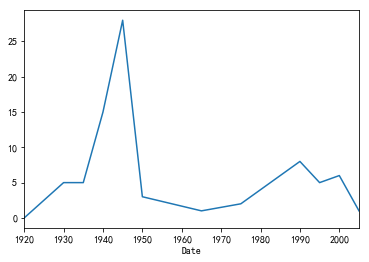

In [110]:
c_y_list = china_crash['Date'].apply(lambda a : a[-4:]).astype(int) // 5 * 5
china_crash.groupby(c_y_list)['Operator'].count().plot(kind='line')

In [111]:
print len(china_crash[c_y_list.isin([1940])]), len(china_crash)
print len(china_crash[c_y_list.isin([1940])]) / (len(china_crash) + 0.0)

print china_crash.loc[c_y_list.isin([1940]), 'Fatalities'].sum(), china_crash['Fatalities'].sum()
print china_crash.loc[c_y_list.isin([1940]), 'Fatalities'].sum() / china_crash['Fatalities'].sum()

15 91
0.164835164835
69.0 2260.0
0.0305309734513


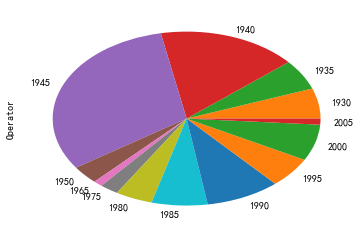

In [112]:
china_crash.groupby(c_y_list)['Operator'].count().plot(kind='pie')

## 世界空难

* 从全球范围来看，空难数量是一直呈增加趋势的，在70年代达到顶点，之后总体呈下降趋势。


* 在40年代中期，60年代末和80年代末都出现了空难的高峰。

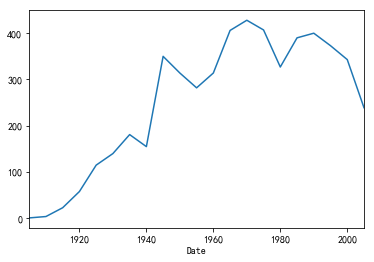

In [113]:
crash.groupby(crash['Date'].apply(lambda a : a[-4:])
              .astype(int) // 5*5)['Operator'].count().plot(kind='line')

## 美国空难

* 从发生空难的国家来看，在美国发生的空难数远超其他国家。占到了全球总空难数的25.9%。


* 但是全球的航空运输飞机总量大约为[23600架](www.telegraph.co.uk/travel/travel-truths/how-many-planes-are-there-in-the-world/)，而美国在2014年共有航空运输飞机[6676架](https://www.rita.dot.gov/bts/sites/rita.dot.gov.bts/files/publications/national_transportation_statistics/html/table_01_03.html)，美国约占全球的28.3%。这么来看，美国如此多的空难数也就是不足为奇了。



In [114]:
USA_crash = crash[crash['Nation'] == 'USA']

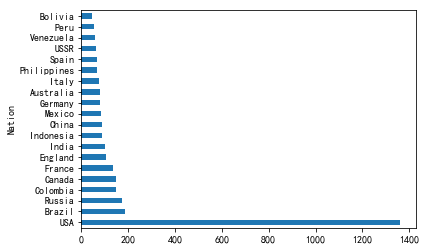

In [115]:
crash.groupby('Nation')['Operator'].count().sort_values(ascending=False)[:20].plot(kind='barh')

* 美国的空难数量多，但是因此死亡的人数并不多。一共有15550人因空难死亡，只占全球空难死亡总人数的14.7%。


* 在美国乘坐飞机，如果发生空难，死亡率是63.6%，比全球平均数73.0%低了十个百分点。

 
* 在美国发生空难的飞机中，平均载员数为17.9，而在全球范围内这个数字是27.4，美国比全球平均数要低34.7%。


* 发生空难后死亡率低和飞机载员数少这两个原因共同导致，美国虽然空难数多，但是相对来说死亡人数并不多。

In [116]:
print float(len(USA_crash)) / len(crash)
print USA_crash['Fatalities'].sum()
print USA_crash['Fatalities'].sum() / crash['Fatalities'].sum()

print '空难死亡率'
print '全球', crash['Fatalities'].sum() / crash['Aboard'].sum()
print '美国', USA_crash['Fatalities'].sum() / USA_crash['Aboard'].sum()

0.259111617312
15550.0
0.147422709734
空难死亡率
全球 0.729700936002
美国 0.635965809169


In [117]:
print USA_crash['Aboard'].sum() / len(USA_crash)
print crash['Aboard'].sum() / len(crash)

17.9128205128
27.4394457099


本来是试图分析空难死亡率的排名，但排名低的国家空难数也低，暂时无法找到有效且可信的剔除标准，故放弃此指标。

In [118]:
n_crash = crash.groupby('Nation')

In [119]:
a = n_crash[['Aboard', 'Fatalities']].sum()

In [120]:
b = n_crash['Operator'].count()

In [121]:
n_crash = pd.merge(a, DataFrame(b), left_index=True, right_index=True)

In [122]:
n_crash['rate'] = n_crash['Fatalities'] / n_crash['Aboard']

In [123]:
n_crash[(n_crash['Operator'] > 5) & (n_crash['Fatalities'] > 100) ].sort_values('rate')

,Aboard,Fatalities,Operator,rate
Nation,,,,
Netherlands,307.0,106.0,12,0.345277
Sweden,283.0,117.0,11,0.413428
South Korea,1240.0,518.0,17,0.417742
Massachusett,434.0,192.0,6,0.442396
Guatemala,636.0,283.0,17,0.444969
Jordan,260.0,120.0,7,0.461538
Philippines,2569.0,1266.0,68,0.492799
Hong Kong,353.0,196.0,9,0.555241
Ethiopia,527.0,301.0,17,0.571157


## 飞机所属公司（部门）

In [124]:
#crash.groupby('Operator')['Aboard', 'Fatalities'].sum()
a = crash.groupby('Operator')['Operator'].count()
b = crash.groupby('Operator')[['Aboard', 'Fatalities']].sum()
o_crash = pd.merge(DataFrame(a), b, left_index=True, right_index=True)

In [125]:
o_crash['rate'] = o_crash['Fatalities'] / o_crash['Aboard']

In [126]:
o_crash.sort_values('Operator', ascending=False)[:10]

,Operator,Aboard,Fatalities,rate
Operator,,,,
Aeroflot,179,8870.0,7156.0,0.806764
Military - U.S. Air Force,176,4502.0,3717.0,0.825633
Air France,70,2874.0,1734.0,0.603340
Deutsche Lufthansa,65,510.0,396.0,0.776471
United Air Lines,44,2460.0,1021.0,0.415041
Air Taxi,44,176.0,161.0,0.914773
China National Aviation Corporation,44,374.0,409.0,1.093583
Military - U.S. Army Air Forces,43,1100.0,1070.0,0.972727
Pan American World Airways,41,2812.0,1302.0,0.463016


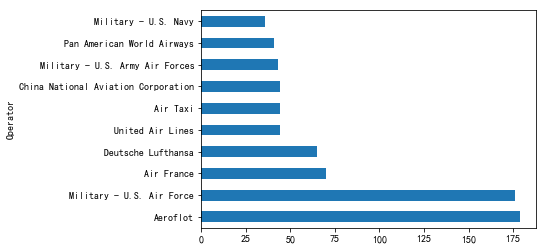

In [127]:
o_crash.sort_values('Operator', ascending=False).iloc[:10, 0].plot(kind='barh')

从飞机的归属来看，空难数最多的是俄罗斯国际航空公司(Aeroflot)，空难数达到了179起;其次是美国空军(U.S. Air Force),176起;排在第三的是法国航空(Air France),空难数为70起。

## 机型

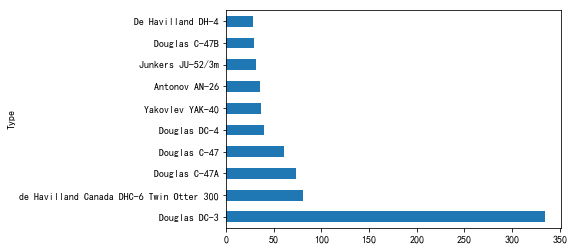

In [128]:
crash.groupby('Type')['Operator'].count().sort_values(ascending=False)[:10].plot(kind='barh')

In [129]:
(334 + 74 + 62) / 752.0

0.625

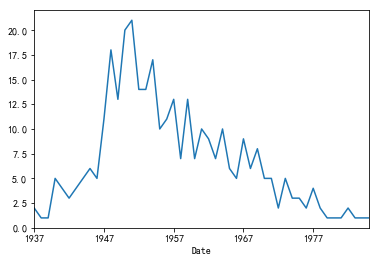

In [130]:
t_crash = crash[crash['Type'] == 'Douglas DC-3']
t_crash.groupby(t_crash['Date'].apply(lambda a : a[-4:]))['Operator'].count().plot()

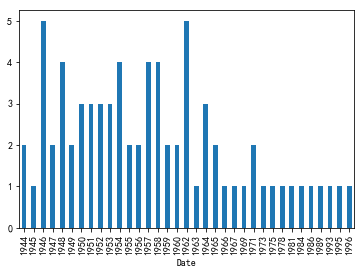

In [131]:
t_crash = crash[crash['Type'] == 'Douglas C-47A']
t_crash.groupby(t_crash['Date'].apply(lambda a : a[-4:]))['Operator'].count().plot(kind='bar')

* 从机型来看，空难数第一的是“道格拉斯DC-3型飞机”，其次是"德哈维兰加拿大DHC-6",再之后是"道格拉斯DC-47A",和“DC-47”。需要说明的是，DC-47实际上就是DC-3的军用型,二战结束之后，大量的DC-47转为民用，这时它们就又用回了DC-3这个型号。


* DC-3及其军用型的总空难数，在空难数前十的机型的空难之和中，占到了62.5%。

## 制造商

In [132]:
import re

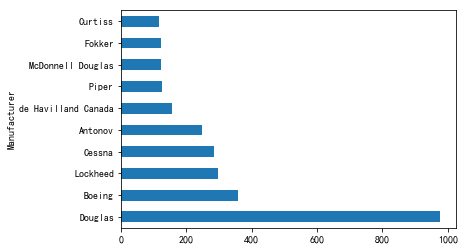

In [133]:
#导出飞机制造商
def get_manufacturer(name):
    name = str(name).split(' ')
    result = name[0]
    for i in range(1, len(name)):
        if bool(re.search('[\dI]', name[i])):
            break;
        result = result + ' ' + name[i]
    return result

crash['Manufacturer'] = crash['Type'].apply(get_manufacturer)

从飞机的制造商来看，空难数排在第一的是道格拉斯公司，其次是波音公司，第三是洛克希德公司。